# E-Commerce Online Retail Problem Description

Conducting exploratory analysis and data preprocessing on a transnational dataset which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail

# Importing Required Packages

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

# Reading Dataset

In [2]:
df = pd.read_csv("Online Retail.csv", dtype={'CustomerID': str})

# Assessment

In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


# Exploratory Data Analysis

# 1. Which country makes the most transactions?

In [6]:
df["Country"].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [7]:
df["Country"].value_counts().head(1)

United Kingdom    495478
Name: Country, dtype: int64

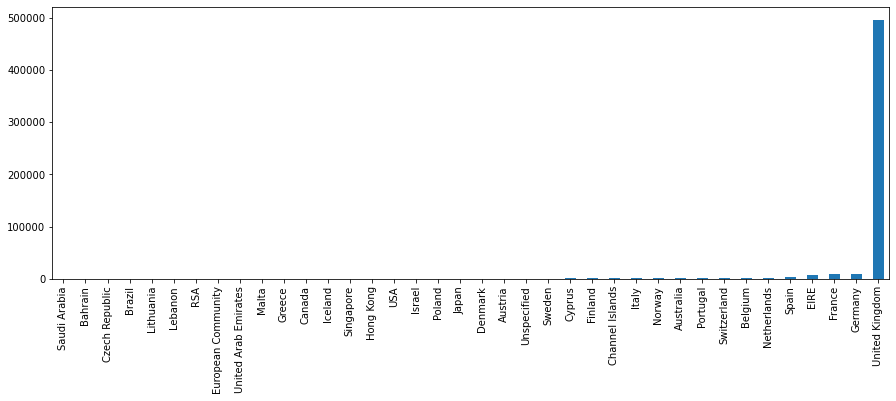

In [8]:
df.Country.value_counts().sort_values().plot(kind = 'bar',figsize=(15,5))

# 6. Total Revenue For Each Row

In [7]:
df['Revenue'] = df.Quantity*df.UnitPrice
df.Revenue

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Revenue, Length: 541909, dtype: float64

# 2. Show Top 10 Customers Who Made Largest Revenue

In [11]:
#This means: "for each customer, what is the sum of revenue?"
df.groupby('CustomerID').Revenue.sum()

CustomerID
12346       0.00
12347    4310.00
12348    1797.24
12349    1757.55
12350     334.40
          ...   
18280     180.60
18281      80.82
18282     176.60
18283    2094.88
18287    1837.28
Name: Revenue, Length: 4372, dtype: float64

In [12]:
top10 = df.groupby('CustomerID').Revenue.sum()
top10.sort_values(axis=0, ascending=False, inplace=False).head(10)

CustomerID
14646    279489.02
18102    256438.49
17450    187482.17
14911    132572.62
12415    123725.45
14156    113384.14
17511     88125.38
16684     65892.08
13694     62653.10
15311     59419.34
Name: Revenue, dtype: float64

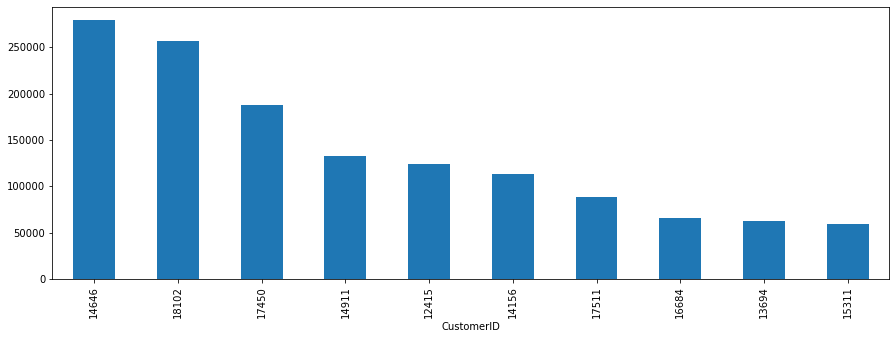

In [13]:
top10.sort_values(axis=0, ascending=False, inplace=False).head(10).plot(kind='bar', figsize=(15,5))

# 3. Show Top 5 Frequent Customers

In [14]:
df["CustomerID"].value_counts().head(5)

17841    7983
14911    5903
14096    5128
12748    4642
14606    2782
Name: CustomerID, dtype: int64

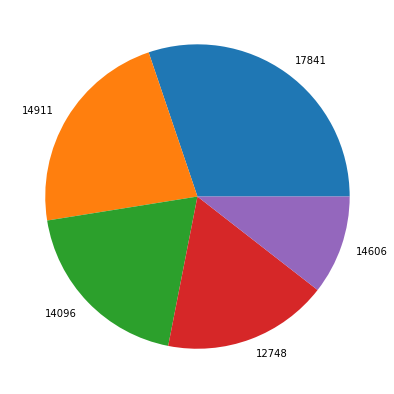

In [15]:
top5 = df["CustomerID"].value_counts().head(5).copy()
ID = [17841,14911,14096,12748,14606]
fig = plt.figure(figsize =(10, 7))
plt.pie(top5, labels = ID)
plt.show()

# 4. The Count Of Words Of Description

In [16]:
df.Description = df["Description"].str.lower()
df["Description"] = df['Description'].str.replace('[-,./+&*\']','')

In [17]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,12/9/2011 12:50,0.85,12680,France,10.20
541905,581587,22899,childrens apron dolly girl,6,12/9/2011 12:50,2.10,12680,France,12.60
541906,581587,23254,childrens cutlery dolly girl,4,12/9/2011 12:50,4.15,12680,France,16.60
541907,581587,23255,childrens cutlery circus parade,4,12/9/2011 12:50,4.15,12680,France,16.60


In [18]:
df["DescriptionLength"]= df["Description"].str.len()
df["DescriptionLength"]

0         33.0
1         19.0
2         30.0
3         35.0
4         29.0
          ... 
541904    27.0
541905    27.0
541906    29.0
541907    31.0
541908    29.0
Name: DescriptionLength, Length: 541909, dtype: float64

In [20]:
counts = df["DescriptionLength"].value_counts()
counts

30.0    38955
29.0    36933
27.0    36858
31.0    36220
28.0    35108
26.0    34713
33.0    32998
24.0    32724
22.0    32292
32.0    30983
25.0    30217
34.0    27006
23.0    25867
35.0    17621
21.0    17291
18.0    16397
20.0    14843
19.0    13843
17.0     8035
14.0     5649
16.0     4557
13.0     3772
15.0     2705
7.0      1440
12.0      965
6.0       603
9.0       529
10.0      451
11.0      378
8.0       236
5.0       198
1.0        47
4.0        10
2.0         7
3.0         4
Name: DescriptionLength, dtype: int64

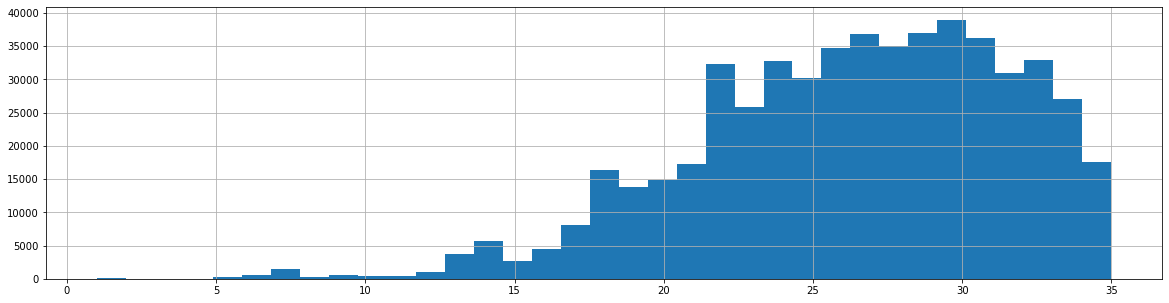

In [45]:
#A histogram might not be the best choice here as it depends too much on the maximum and minimum values
plot = df["DescriptionLength"].hist(bins=35, figsize=(20,5))

# 5. Feature Extraction

In [11]:
df["InvoiceDate"]= pd.to_datetime(df["InvoiceDate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
 8   Revenue      541909 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [12]:
df['Date'] = pd.DatetimeIndex(df['InvoiceDate']).date
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['Quarter'] = pd.DatetimeIndex(df['InvoiceDate']).quarter
df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month
df['Week'] = pd.DatetimeIndex(df['InvoiceDate']).week
df['WeekDay'] = pd.DatetimeIndex(df['InvoiceDate']).dayofweek
df['DayOfYear'] = pd.DatetimeIndex(df['InvoiceDate']).dayofyear
df['Day'] = pd.DatetimeIndex(df['InvoiceDate']).day

In [24]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,DescriptionLength,Date,Year,Quarter,Month,Week,WeekDay,DayOfYear,Day
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,33.0,2010-12-01,2010,4,12,48,2,335,1
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,19.0,2010-12-01,2010,4,12,48,2,335,1
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,30.0,2010-12-01,2010,4,12,48,2,335,1
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,35.0,2010-12-01,2010,4,12,48,2,335,1
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,29.0,2010-12-01,2010,4,12,48,2,335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20,27.0,2011-12-09,2011,4,12,49,4,343,9
541905,581587,22899,childrens apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60,27.0,2011-12-09,2011,4,12,49,4,343,9
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60,29.0,2011-12-09,2011,4,12,49,4,343,9
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60,31.0,2011-12-09,2011,4,12,49,4,343,9


# 7. Aggregate Revenue

In [16]:
grouped_features= ['InvoiceDate', 'StockCode', 'Date', 'Year', 'Quarter', 'Month', 
                   'Week', 'WeekDay', 'DayOfYear', 'Day']
df.groupby(grouped_features).Revenue.sum()

InvoiceDate          StockCode  Date        Year  Quarter  Month  Week  WeekDay  DayOfYear  Day
2010-12-01 08:26:00  21730      2010-12-01  2010  4        12     48    2        335        1      25.50
                     22752      2010-12-01  2010  4        12     48    2        335        1      15.30
                     71053      2010-12-01  2010  4        12     48    2        335        1      20.34
                     84029E     2010-12-01  2010  4        12     48    2        335        1      20.34
                     84029G     2010-12-01  2010  4        12     48    2        335        1      20.34
                                                                                                   ...  
2011-12-09 12:50:00  22730      2011-12-09  2011  4        12     49    4        343        9      15.00
                     22899      2011-12-09  2011  4        12     49    4        343        9      12.60
                     23254      2011-12-09  2011  4        12   

In [14]:
df.groupby('InvoiceDate').Revenue.sum()

InvoiceDate
2010-12-01 08:26:00    139.12
2010-12-01 08:28:00     22.20
2010-12-01 08:34:00    348.78
2010-12-01 08:35:00     17.85
2010-12-01 08:45:00    855.86
                        ...  
2011-12-09 12:23:00    124.60
2011-12-09 12:25:00    140.64
2011-12-09 12:31:00    329.05
2011-12-09 12:49:00    339.20
2011-12-09 12:50:00    249.45
Name: Revenue, Length: 23260, dtype: float64

In [26]:
df.groupby('StockCode').Revenue.sum()

StockCode
10002           759.89
10080           119.09
10120            40.53
10123C            3.25
10123G            0.00
                 ...  
gift_0001_20    167.05
gift_0001_30    175.53
gift_0001_40    100.70
gift_0001_50    167.56
m                 2.55
Name: Revenue, Length: 4070, dtype: float64

In [27]:
df.groupby('Date').Revenue.sum()

Date
2010-12-01    58635.56
2010-12-02    46207.28
2010-12-03    45620.46
2010-12-05    31383.95
2010-12-06    53860.18
                ...   
2011-12-05    57751.32
2011-12-06    54228.37
2011-12-07    75076.22
2011-12-08    81417.78
2011-12-09    32131.53
Name: Revenue, Length: 305, dtype: float64

In [28]:
df.groupby('Year').Revenue.sum()

Year
2010    7.489570e+05
2011    8.998791e+06
Name: Revenue, dtype: float64

In [29]:
df.groupby('Quarter').Revenue.sum()

Quarter
1    1.741330e+06
2    1.907664e+06
3    2.383668e+06
4    3.715086e+06
Name: Revenue, dtype: float64

In [30]:
df.groupby('Month').Revenue.sum()

Month
1      560000.260
2      498062.650
3      683267.080
4      493207.121
5      723333.510
6      691123.120
7      681300.111
8      682680.510
9     1019687.622
10    1070704.670
11    1461756.250
12    1182625.030
Name: Revenue, dtype: float64

In [31]:
df.groupby('Week').Revenue.sum()

Week
1      93720.930
2     190994.960
3     133782.910
4     119136.810
5     123642.180
6     102296.930
7     139664.580
8     133069.930
9     130435.560
10    129180.960
11    145262.610
12    147909.800
13    183501.710
14    121598.220
15    147459.771
16    115461.250
17     84382.660
18    130354.310
19    205445.230
20    198031.530
21    160569.820
22    116932.520
23    177916.870
24    184016.500
25    117086.710
26    136287.440
27    174659.170
28    124163.170
29    182513.960
30    180814.851
31    153176.200
32    161417.020
33    170724.890
34    149603.500
35    143819.060
36    190513.470
37    211722.620
38    326156.721
39    206858.231
40    302466.590
41    205734.640
42    263762.220
43    238642.190
44    288266.770
45    346560.140
46    380407.570
47    308185.020
48    501722.240
49    570892.250
50    207052.170
51     89770.570
Name: Revenue, dtype: float64

In [32]:
df.groupby('WeekDay').Revenue.sum()

WeekDay
0    1588609.431
1    1966182.791
2    1734147.010
3    2112519.000
4    1540610.811
6     805678.891
Name: Revenue, dtype: float64

In [33]:
df.groupby('DayOfYear').Revenue.sum()

DayOfYear
4      14950.48
5      -1566.23
6      37392.74
7      27233.14
9      15710.80
         ...   
353     7517.31
354    24741.75
355    47097.94
356     6134.57
357    11796.31
Name: Revenue, Length: 298, dtype: float64

In [34]:
df.groupby('Day').Revenue.sum()

Day
1     316071.890
2     288695.230
3     308138.110
4     367045.110
5     343915.610
6     380870.830
7     449779.870
8     386585.090
9     341012.900
10    344479.060
11    388681.410
12    233003.460
13    277628.990
14    426268.130
15    326559.401
16    291751.820
17    399025.900
18    307933.470
19    262430.490
20    394573.270
21    372897.200
22    283117.640
23    283882.840
24    280461.440
25    272417.331
26    202768.502
27    239582.040
28    320351.210
29    233292.940
30    251110.250
31    173416.500
Name: Revenue, dtype: float64

# 8. Aggregate Quantity

In [17]:
df.groupby(grouped_features).Quantity.sum()

InvoiceDate          StockCode  Date        Year  Quarter  Month  Week  WeekDay  DayOfYear  Day
2010-12-01 08:26:00  21730      2010-12-01  2010  4        12     48    2        335        1      6
                     22752      2010-12-01  2010  4        12     48    2        335        1      2
                     71053      2010-12-01  2010  4        12     48    2        335        1      6
                     84029E     2010-12-01  2010  4        12     48    2        335        1      6
                     84029G     2010-12-01  2010  4        12     48    2        335        1      6
                                                                                                  ..
2011-12-09 12:50:00  22730      2011-12-09  2011  4        12     49    4        343        9      4
                     22899      2011-12-09  2011  4        12     49    4        343        9      6
                     23254      2011-12-09  2011  4        12     49    4        343        9   

In [35]:
df.groupby('InvoiceDate').Quantity.sum()

InvoiceDate
2010-12-01 08:26:00     40
2010-12-01 08:28:00     12
2010-12-01 08:34:00     98
2010-12-01 08:35:00      3
2010-12-01 08:45:00    449
                      ... 
2011-12-09 12:23:00     76
2011-12-09 12:25:00    120
2011-12-09 12:31:00    278
2011-12-09 12:49:00     66
2011-12-09 12:50:00    105
Name: Quantity, Length: 23260, dtype: int64

In [36]:
df.groupby('StockCode').Quantity.sum()

StockCode
10002           1037
10080            495
10120            193
10123C           -13
10123G           -38
                ... 
gift_0001_20      20
gift_0001_30      37
gift_0001_40       3
gift_0001_50       4
m                  1
Name: Quantity, Length: 4070, dtype: int64

In [37]:
df.groupby('Date').Quantity.sum()

Date
2010-12-01    26814
2010-12-02    21023
2010-12-03    14830
2010-12-05    16395
2010-12-06    21419
              ...  
2011-12-05    44119
2011-12-06    29026
2011-12-07    39612
2011-12-08    34460
2011-12-09    12949
Name: Quantity, Length: 305, dtype: int64

In [38]:
df.groupby('Year').Quantity.sum()

Year
2010     342228
2011    4834222
Name: Quantity, dtype: int64

In [39]:
df.groupby('Quarter').Quantity.sum()

Quarter
1     938827
2    1011112
3    1347132
4    1879379
Name: Quantity, dtype: int64

In [40]:
df.groupby('Month').Quantity.sum()

Month
1     308966
2     277989
3     351872
4     289098
5     380391
6     341623
7     391116
8     406199
9     549817
10    570532
11    740286
12    568561
Name: Quantity, dtype: int64

In [41]:
df.groupby('Week').Quantity.sum()

Week
1      73491
2      85626
3      67969
4      69312
5      67613
6      50021
7      80047
8      82996
9      67230
10     54064
11     86728
12     72236
13    104528
14     61496
15     85028
16     72855
17     50499
18     75287
19    103016
20    105828
21     80900
22     57291
23     96304
24     70529
25     66727
26     72782
27     91504
28     79742
29    104485
30    104921
31     96503
32     98225
33     96816
34     97497
35     66653
36    108820
37    116893
38    165070
39    117919
40    158476
41    104666
42    150811
43    143273
44    140791
45    176997
46    179216
47    162568
48    230869
49    278614
50    105446
51     39272
Name: Quantity, dtype: int64

In [42]:
df.groupby('WeekDay').Quantity.sum()

WeekDay
0     815354
1     961543
2     969558
3    1167823
4     794440
6     467732
Name: Quantity, dtype: int64

In [43]:
df.groupby('DayOfYear').Quantity.sum()

DayOfYear
4       7939
5      18435
6      22461
7      16475
9       8181
       ...  
353     3795
354    14965
355    15467
356     3192
357     5648
Name: Quantity, Length: 298, dtype: int64

In [44]:
df.groupby('Day').Quantity.sum()

Day
1     174981
2     142711
3     152700
4     190694
5     228054
6     206115
7     230661
8     182879
9     169611
10    169828
11    204027
12    139775
13    167079
14    170087
15    173666
16    159091
17    206894
18    180565
19    153037
20    212509
21    184385
22    160982
23    147214
24    159063
25    153505
26    113335
27    143005
28    187364
29    116389
30    123118
31     73126
Name: Quantity, dtype: int64